In [ ]:
# Transfer Learning

In [ ]:
# Problem Statement : Classification of Urban / Rural Landscape

In [ ]:
# Load Libraries

import numpy as np
import tensorflow
import random

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

In [ ]:
# Unzip Files

!unzip Dataset.zip -d Dataset
!unzip ResNet.zip -d ResNet

Archive:  Dataset.zip
  inflating: Dataset/rural_and_urban_photos/train/rural/rural1.jpeg  
  inflating: Dataset/rural_and_urban_photos/train/rural/rural11.jpeg  
  inflating: Dataset/rural_and_urban_photos/train/rural/rural12.jpeg  
  inflating: Dataset/rural_and_urban_photos/train/rural/rural13.jpeg  
  inflating: Dataset/rural_and_urban_photos/train/rural/rural14.jpeg  
  inflating: Dataset/rural_and_urban_photos/train/rural/rural16.jpeg  
  inflating: Dataset/rural_and_urban_photos/train/rural/rural17.jpeg  
  inflating: Dataset/rural_and_urban_photos/train/rural/rural18.jpeg  
  inflating: Dataset/rural_and_urban_photos/train/rural/rural19.jpg  
  inflating: Dataset/rural_and_urban_photos/train/rural/rural2.jpeg  
  inflating: Dataset/rural_and_urban_photos/train/rural/rural21.jpg  
  inflating: Dataset/rural_and_urban_photos/train/rural/rural22.jpeg  
  inflating: Dataset/rural_and_urban_photos/train/rural/rural23.jpeg  
  inflating: Dataset/rural_and_urban_photos/train/rural/rur

In [ ]:

num_classes  = 2     # Urbal and Rural
resnet_weights_path = '/content/ResNet/resnet50_weights_tf_dim_ordering_tf_kernels.h5'

In [ ]:
 # Create New Model  =>  ResNet (ImageNet Data)  +  Define Layers

In [ ]:
Model = Sequential()
Model.add(ResNet50(include_top= False ,pooling=  "avg" , weights= 'imagenet' ))
# Add Dense Layer : Classification Layer
Model.add(Dense(units= 2, activation= 'softmax'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
# Disable ResNet Layer Training
Model.layers[0].trainable = False


In [ ]:
# Summary of Model

Model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         4,098 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,591,810 (90.00 MB)

 Trainable params: 4,098 (16.01 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Compile Model

Model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
#
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_gen = ImageDataGenerator(preprocessing_function= preprocess_input)

In [ ]:
# Lets Preprocess training and validation Datasets

training_data = image_gen.flow_from_directory(directory= '/content/Dataset/train',
                                              target_size= (224,224) ,
                                              class_mode= 'categorical'
                                              )

val_data = image_gen.flow_from_directory(directory= '/content/Dataset/val',
                                              target_size= (224,224) ,
                                              class_mode= 'categorical'
                                              )

Found 72 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
# Train Model
Model.fit(training_data , epochs= 3 , validation_data=  val_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 40s 11s/step - accuracy: 0.6393 - loss: 0.6798 - val_accuracy: 0.9500 - val_loss: 0.3059
Epoch 2/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 31s 7s/step - accuracy: 0.9310 - loss: 0.2214 - val_accuracy: 0.9500 - val_loss: 0.1874
Epoch 3/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.9931 - loss: 0.1101 - val_accuracy: 0.9000 - val_loss: 0.1609


In [ ]:
# Testing Model with

In [ ]:
from PIL import Image

In [ ]:
test = Image.open('rural.jpg')

In [ ]:
# Preprocess this Image

def preprocess(img) :
  img1  = img.convert('RGB')     # Coverting test image into  RGB format
  img1  = img1.resize([224, 224])      # Resize it to 224, 224
  img1  = np.array(img1)  /  255       # Scaling Image
  img1_arr = np.expand_dims(img1, axis = 0 )
  return img1_arr


In [ ]:
# Preprocess Test Image  and Predict Outcome     # 0 : "Rural"   1 : "Urban"

prediction = Model.predict(preprocess(test))
prediction > 0.5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


array([[ True, False]])

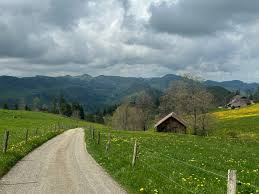

In [ ]:
test

In [ ]:
# Home Work :

#